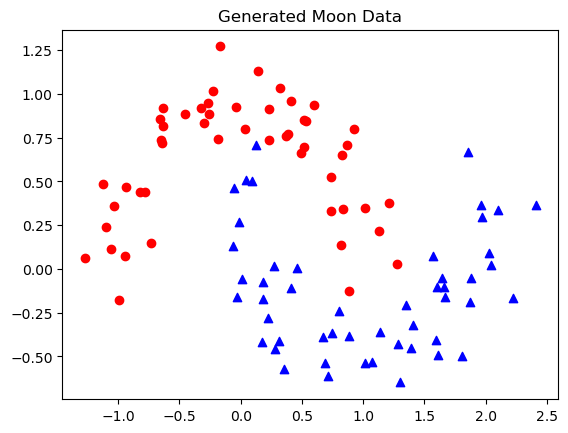

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='^')
plt.title("Generated Moon Data")
plt.show()

2. 使用多项式核和高斯核进行SVM分类

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 多项式核
poly_kernel_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm.fit(X, y)

# 高斯核（径向基函数）
rbf_kernel_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.001, gamma=5))])

3. 可视化结果
为了可视化决策边界和决策函数，我们需要创建一个辅助函数：

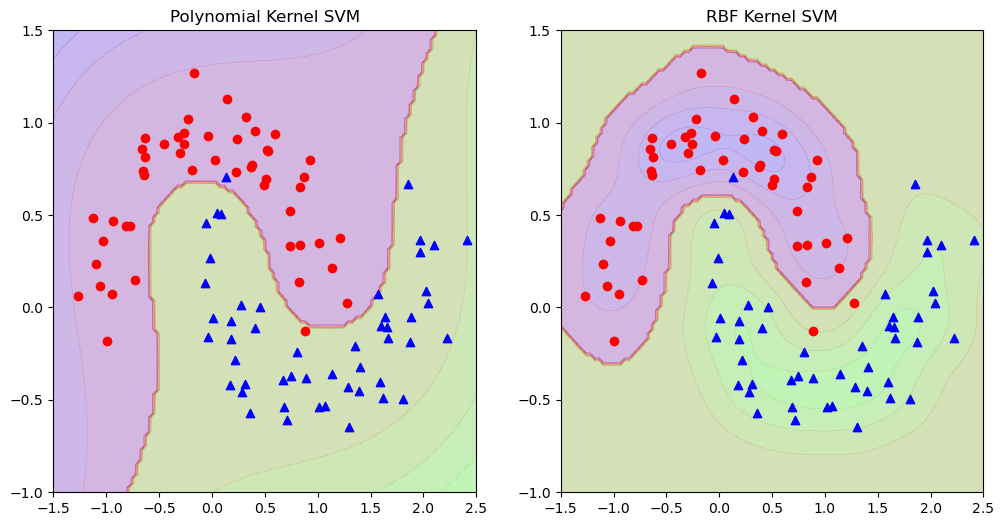

In [3]:
import numpy as np

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_predictions(poly_kernel_svm, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='^')
plt.title("Polynomial Kernel SVM")

plt.subplot(122)
plot_predictions(rbf_kernel_svm, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='^')
plt.title("RBF Kernel SVM")

plt.show()